In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic_prepared.csv")
display(df.head())

,Unnamed: 0,sex,row_number,liters_drunk,drink,check_number,label,age_child,age_adult,age_old,morning,day,evening
0,0,0,90.0,1.0,1,8092,1,False,False,True,False,False,True
1,1,0,81.0,4.0,1,4252,1,False,True,False,False,True,False
2,2,1,14.0,3.0,0,6913,1,False,False,True,False,False,True
3,3,1,0.0,1.0,0,8479,1,False,False,True,False,True,False
4,4,1,84.0,1.0,0,6279,0,False,False,True,True,False,False


In [3]:
from sklearn.model_selection import train_test_split
df_x = df.drop(columns=['label'])
df_y = df['label']

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=True)
print(X_train[:3])
print(y_train[:3])

      Unnamed: 0  sex  row_number  liters_drunk  drink  check_number  \
645          645    0        18.0           1.0      1          3387   
1933        1933    0        88.0           2.5      1          8033   
1548        1548    0        55.0           0.0      1          7060   

      age_child  age_adult  age_old  morning    day  evening  
645       False       True    False    False   True    False  
1933      False       True    False    False  False     True  
1548      False       True    False    False   True    False  
645     1
1933    1
1548    1
Name: label, dtype: int64


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

xgboost_model = XGBClassifier(n_estimators=20, max_depth=4)
tree_model = DecisionTreeClassifier(max_depth=10)
logistic_reg_model = LogisticRegression()

In [6]:
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_acc = accuracy_score(y_test, tree_y_pred)
print(f"Decicion tree accuracy: {tree_acc}")

Decicion tree accuracy: 0.8975903614457831


In [7]:
logistic_reg_model.fit(X_train, y_train)
logistic_y_pred = logistic_reg_model.predict(X_test)
logistic_acc = accuracy_score(y_test, logistic_y_pred)
print(f"Logistic Regression accuracy: {logistic_acc}")

Logistic Regression accuracy: 0.8524096385542169


In [8]:
xgboost_model.fit(X_train, y_train)
xgboost_y_pred = xgboost_model.predict(X_test)
xgboost_acc = accuracy_score(y_test, xgboost_y_pred)
print(f"XGBoost accuracy: {xgboost_acc}") 

XGBoost accuracy: 0.9036144578313253


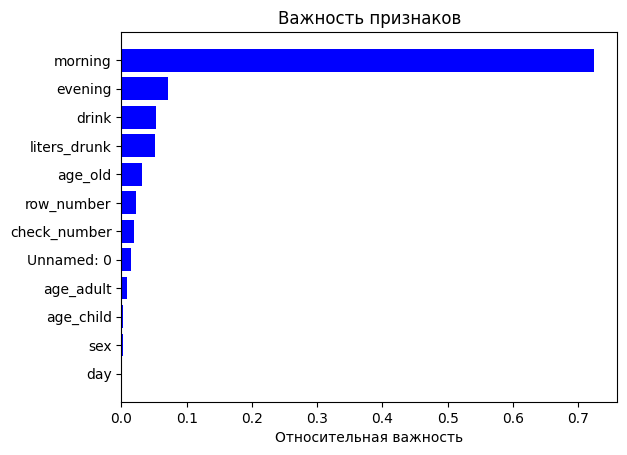

In [9]:
importances = tree_model.feature_importances_
features = df_x.columns

indices = np.argsort(importances)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

In [21]:
df_x_two_features = pd.concat((df['morning'], df['evening']), axis=1)
df_y_two_features = df['label']
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(df_x_two_features, df_y_two_features, test_size=0.1, random_state=True)


In [22]:
tree_model_two_features = DecisionTreeClassifier(max_depth=5)
tree_model_two_features.fit(X_train_two, y_train_two)
tree_preds_two = tree_model_two_features.predict(X_test_two)
tree_two_acc = accuracy_score(y_test_two, tree_preds_two)
print(f"Decicion tree accuracy with two features: {tree_two_acc}")

Decicion tree accuracy with two features: 0.8644578313253012
